In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [2]:
!git clone https://github.com/lfunderburk/stats_can
!pip install pandas --user 
!pip install matplotlib --user 
!pip install qgrid --user

fatal: destination path 'stats_can' already exists and is not an empty directory.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook, we parse and display metadata sets, we download a full dataset and plot a subset of the data. 

We implement a friendly user interface based on buttons and dropdown menus that allows the user to explore multiple data sets and subsets of data for a specified date and classification. 

<h2 align='center'>Downloading Metadata Updated as of December 31 2018</h2>

We will begin downloading metadata. 

Statistics Canada updates their data and metadata regularly. 

Let us download all metadata updated as of 2018-01-31. 

This notebook will automatically download and generate a table which you can filter by category, number of points, start and end date. 

Note that this table allows for keyword search within categories and titles.

In [3]:
%run -i ./stats_can/stats_can/scwds.py
%run -i ./stats_can/stats_can/sc.py

/home/lgutierrezfunderburk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

style = {'description_width': 'initial'}

MD_button = widgets.Button(
    button_style='success',
    description="Download Metadata", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
MD_button.on_click( rerun_cell )
display(MD_button)

Button(button_style='success', description='Download Metadata', layout=Layout(height='30px', width='15%'), sty…

In [5]:
from IPython.core.display import HTML
HTML(
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
    "<p align='center'> Downloading Metatada</p>"
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
)

In [6]:
%run -i ./ParseMetadata.py

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<h2 align='center'>Downloading Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [7]:
prod_ID = widgets.Text(
    value="14100292",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(prod_ID)
display(DS_button)

Text(value='14100292', description='productID value', placeholder='ProductID value', style=DescriptionStyle(de…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [8]:
from IPython.core.display import HTML
HTML(
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
    "<p align='center'> Downloading Full Dataset</p>"
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
)

In [9]:
# # Download data 
productId = prod_ID.value

download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df


# Example
#data = download_and_store_json(productId)

# Example, we will select the study we downloaded previously 

df_fullDATA = read_data_compute_df(productId)
df_fullDATA

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992-03,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438711,1.1.1.1.1.1,18.3,NaN,NaN,NaN,1
1,1992-03,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438712,1.1.1.1.1.2,18.3,NaN,NaN,NaN,1
2,1992-03,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438713,1.1.1.2.1.1,14.7,NaN,NaN,NaN,1
3,1992-03,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438714,1.1.1.2.1.2,14.7,NaN,NaN,NaN,1
4,1992-03,Yukon,2016A000260,Population,Males,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438715,1.1.2.1.1.1,9.4,NaN,NaN,NaN,1
5,1992-03,Yukon,2016A000260,Population,Males,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438716,1.1.2.1.1.2,9.4,NaN,NaN,NaN,1
6,1992-03,Yukon,2016A000260,Population,Males,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438717,1.1.2.2.1.1,7.6,NaN,NaN,NaN,1
7,1992-03,Yukon,2016A000260,Population,Males,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438718,1.1.2.2.1.2,7.6,NaN,NaN,NaN,1
8,1992-03,Yukon,2016A000260,Population,Females,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438719,1.1.3.1.1.1,8.9,NaN,NaN,NaN,1
9,1992-03,Yukon,2016A000260,Population,Females,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438720,1.1.3.1.1.2,8.9,NaN,NaN,NaN,1


<h2 align='center'>Select Data Subsets</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [16]:
subcategories = set([item for item in df_fullDATA.iloc[:,3]])
values = [item for item in df_fullDATA["VALUE"]]
dates = [item for item in df_fullDATA["REF_DATE"]]

datasets_dp = widgets.Dropdown(
    options = subcategories, 
    description ='Select category:', 
    style = style, 
    disabled=False
)

sdates_dp = widgets.Dropdown(
    options = dates, 
    description ='Select starting date:', 
    style = style, 
    disabled=False
)

edates_dp = widgets.Dropdown(
    options = dates, 
    description ='Select end date:', 
    style = style, 
    disabled=False
)

CD_button = widgets.Button(
    button_style='success',
    description="Select Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( rerun_cell )


tab3 = VBox(children=[HBox(children=[datasets_dp,sdates_dp,edates_dp]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load/Modify CSV')
display(tab)

In [11]:
subdata = datasets_dp.value
sdate = sdates_dp.value
edate = edates_dp.value

In [12]:
df_subdata = df_fullDATA[df_fullDATA.iloc[:,3]==subdata]
df_subdata_time = df_subdata[(df_subdata['REF_DATE'] >= sdate) & (df_subdata['REF_DATE'] <= edate)]
df_subdata_time

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
48,1992-03,Yukon,2016A000260,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438759,1.6.1.1.1.1,1.3,NaN,NaN,NaN,1
49,1992-03,Yukon,2016A000260,Unemployment,Both sexes,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438760,1.6.1.1.1.2,1.5,NaN,NaN,NaN,1
50,1992-03,Yukon,2016A000260,Unemployment,Both sexes,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438761,1.6.1.2.1.1,0.9,NaN,NaN,NaN,1
51,1992-03,Yukon,2016A000260,Unemployment,Both sexes,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438762,1.6.1.2.1.2,1.1,NaN,NaN,NaN,1
52,1992-03,Yukon,2016A000260,Unemployment,Males,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438763,1.6.2.1.1.1,0.7,NaN,NaN,NaN,1
53,1992-03,Yukon,2016A000260,Unemployment,Males,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438764,1.6.2.1.1.2,0.9,NaN,NaN,NaN,1
54,1992-03,Yukon,2016A000260,Unemployment,Males,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438765,1.6.2.2.1.1,0.5,NaN,NaN,NaN,1
55,1992-03,Yukon,2016A000260,Unemployment,Males,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438766,1.6.2.2.1.2,0.6,NaN,NaN,NaN,1
56,1992-03,Yukon,2016A000260,Unemployment,Females,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438767,1.6.3.1.1.1,0.6,NaN,NaN,NaN,1
57,1992-03,Yukon,2016A000260,Unemployment,Females,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438768,1.6.3.1.1.2,0.6,NaN,NaN,NaN,1


<h2 align='center'>Plot Data Subsets</h2>

Once you have verified your pandas dataframe is not empty, press the button below to plot your data. 

You can try multiple values and data ranges. 


In [13]:
PD_button = widgets.Button(
    button_style='success',
    description="Plot Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
PD_button.on_click( rerun_cell )

display(PD_button)

Button(button_style='success', description='Plot Dataset', layout=Layout(height='30px', width='15%'), style=Bu…

<IPython.core.display.Javascript object>

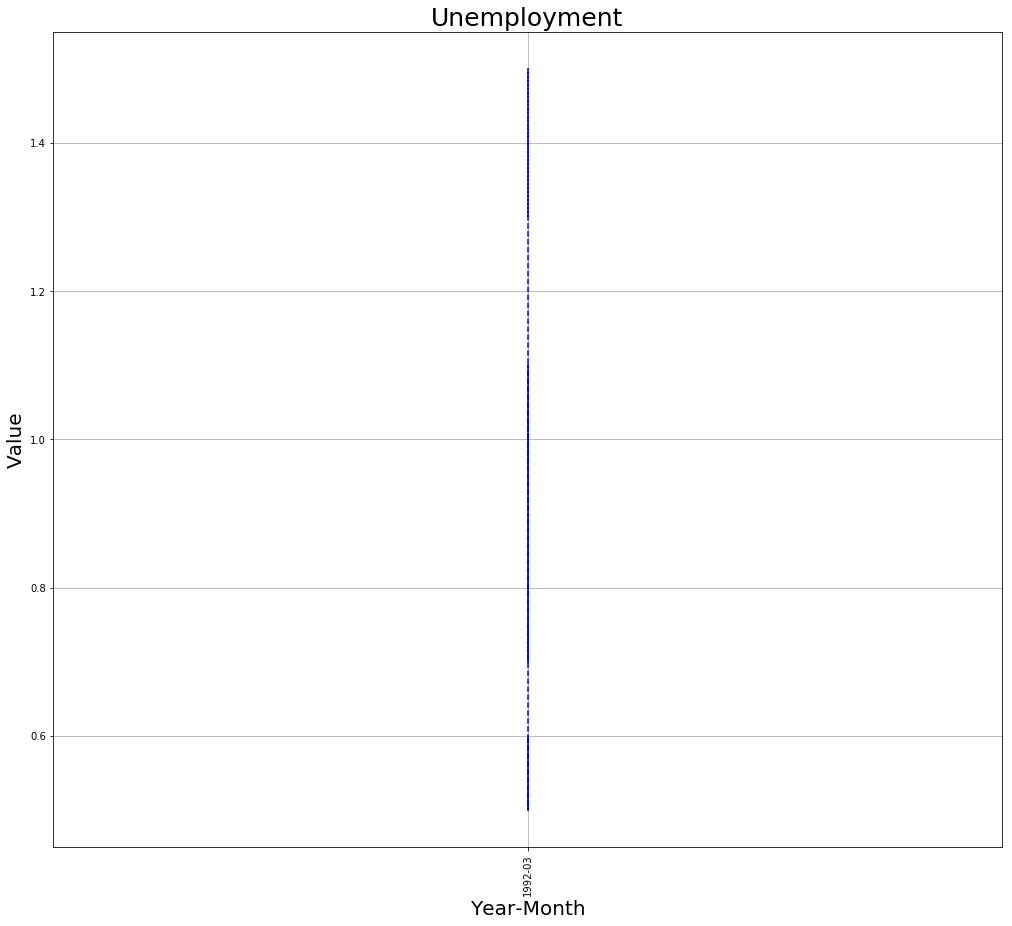

In [15]:

import matplotlib.pyplot as plt

fig = plt.figure(facecolor='w',figsize=(17,15))
ax  = fig.add_subplot(111,facecolor = '#ffffff')

plt.plot(df_subdata_time["REF_DATE"],df_subdata_time["VALUE"],'b--',label='Rates (percent)')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(subdata,fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

<h2 align='center'>References</h2>

[1] https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501



![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)